In [120]:
# Import libraries
import pandas as pd
import numpy as np
import networkx as nx  
import json
import random
import collections
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [121]:
# read in JSON into dataframe
def preprocess():
    with open('../data/train.json') as json_file:
        df = pd.read_json(json_file, orient='columns')
        cuisines = df.cuisine.unique()
    return df, cuisines

In [122]:
# get all the recipes for a cuisine
def get_cuisine_data(df, cuisine):
    data = df[df['cuisine']==cuisine].ingredients
    return data

In [123]:
# create a dictionary mapping cuisine to all recipes of that cuisine type
def create_cuisine_dict(df, cuisines):
    cuisine_dict = {}
    for cuisine in cuisines:
        cuisine_dict["{0}".format(cuisine)] = get_cuisine_data(df, cuisine)
    return cuisine_dict

In [201]:
# remove the 12 most common ingredients
def remove_common_ingredients(cuisine_dict):
    common_ingredients = ['salt','olive oil', 'onions', 'water', 'garlic', 'sugar', 'garlic cloves', 'butter', 'ground black pepper', 'all-purpose flour', 'pepper', 'vegetable oil']
    for cuisine in dataset[1]:
        for recipe in cuisine_dict[cuisine]:
            for word in list(recipe):
                if word in common_ingredients:
                    recipe.remove(word)
    return cuisine_dict

In [202]:
# define function to create association rule graph
def draw_graph(rules, num_rules):
    graph = nx.DiGraph()

    color_map=[]
    N = 50
    colors = np.random.rand(N)       

    for i in range(num_rules): 
        graph.add_node("R"+str(i))

        for a in rules.iloc[i]['antecedents']:
            graph.add_node(a)
            graph.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

        for c in rules.iloc[i]['consequents']:
            graph.add_node(c)
            graph.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    edges = graph.edges()
    colors = [graph[u][v]['color'] for u,v in edges]
    weights = [graph[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(graph, k=16, scale=1)
    nx.draw(graph, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(graph, pos)
    plt.show()

In [289]:
def create_rules(cuisine_data):
    # encode data for apriori algo
    encoder = TransactionEncoder()
    fit_data = encoder.fit(cuisine_data).transform(cuisine_data)
    encoded_df = pd.DataFrame(fit_data, columns=encoder.columns_)
    
    # define frequent itemsets
    frequent_itemsets = apriori(encoded_df, min_support=0.05, use_colnames=True).sort_values('support', ascending=False)
#     print(frequent_itemsets)
    
    # create association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
#     print(rules[['antecedents', 'consequents', 'support', 'confidence']])
    
    # draw graph
    draw_graph(rules, 10)

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


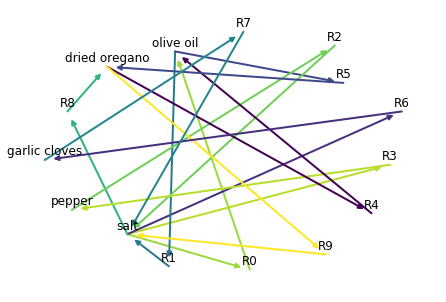

greek


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


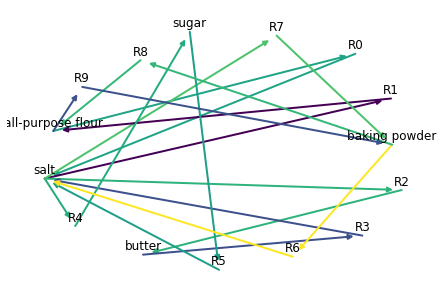

southern_us


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


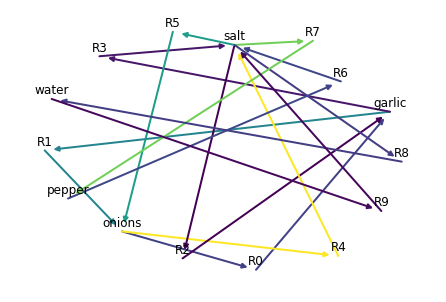

filipino


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


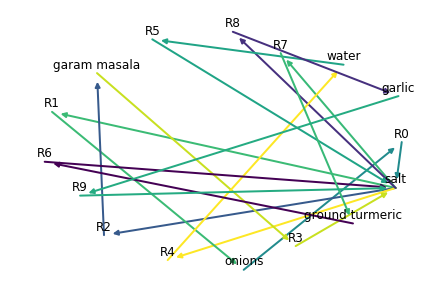

indian


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


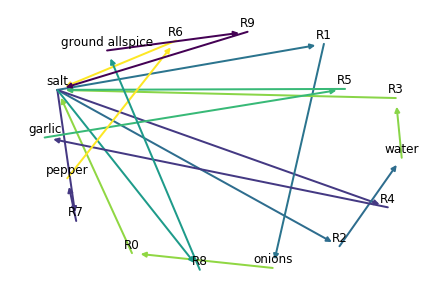

jamaican


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


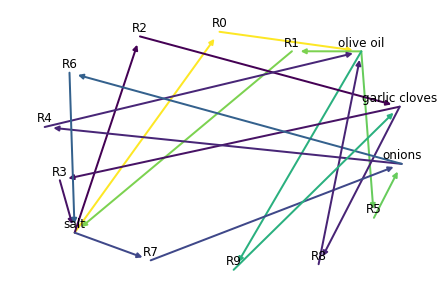

spanish


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


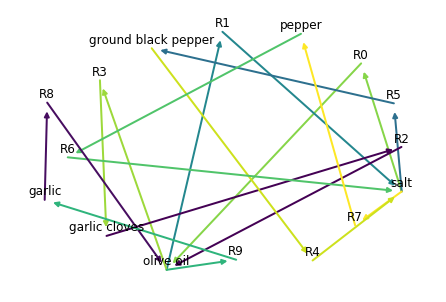

italian


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


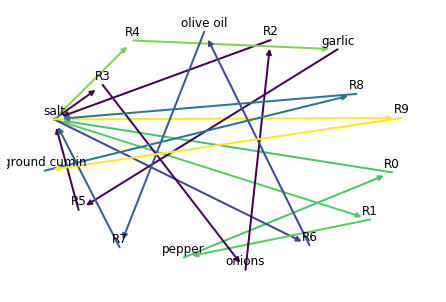

mexican


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


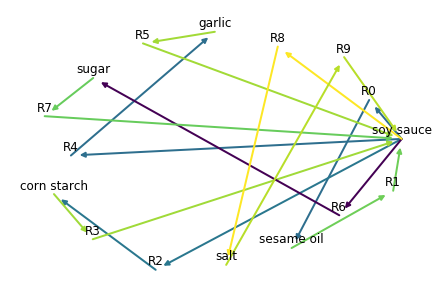

chinese


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


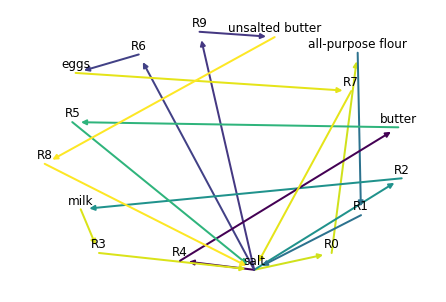

british


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


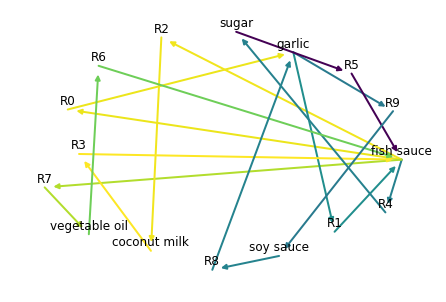

thai


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


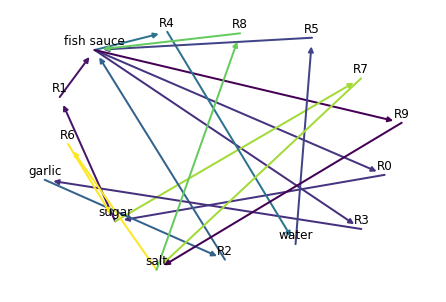

vietnamese


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


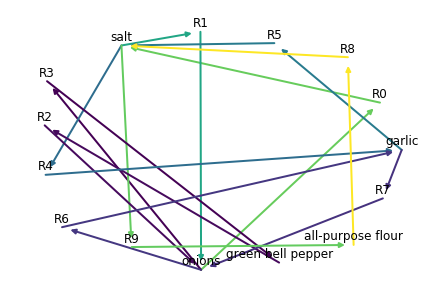

cajun_creole


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


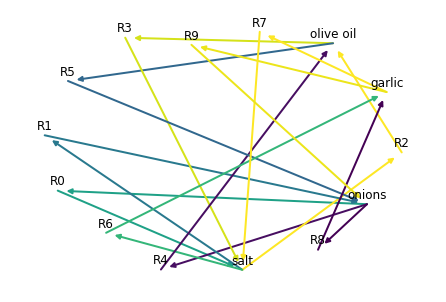

brazilian


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


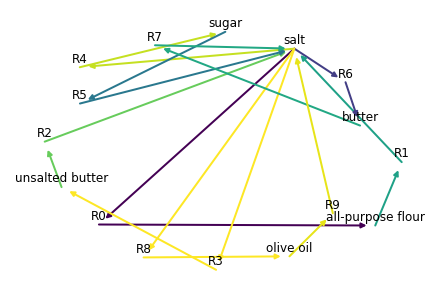

french


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


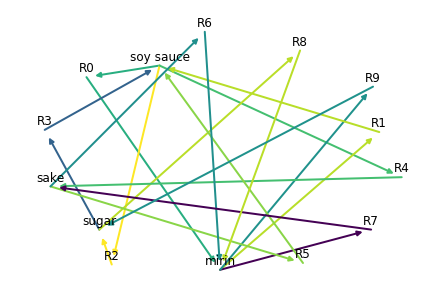

japanese


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


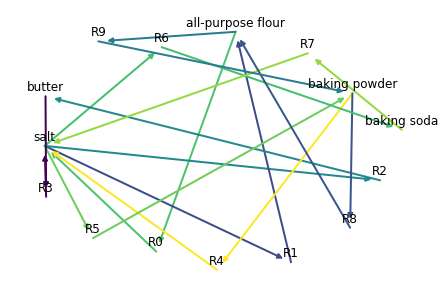

irish


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


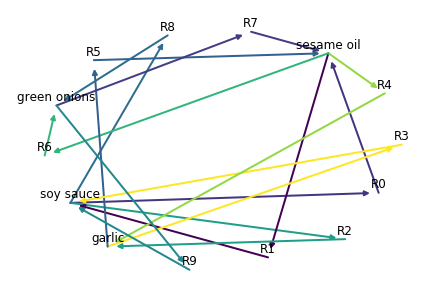

korean


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


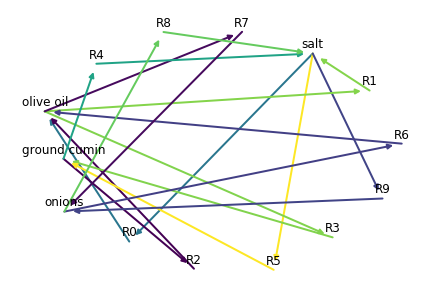

moroccan


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


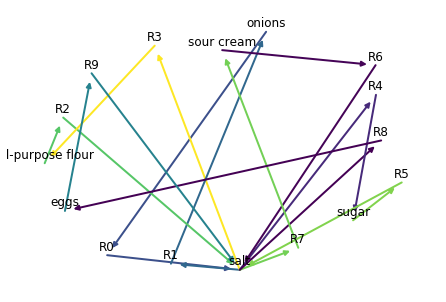

russian


In [290]:
# call all functions 
dataset = preprocess()
cuisine_dict = create_cuisine_dict(dataset[0], dataset[1])
# filtered = remove_common_ingredients(cuisine_dict)
for cuisine in dataset[1]:
    create_rules(cuisine_dict[cuisine])
    print(cuisine)

     support                                     itemsets
4   0.226383                              (dried oregano)
9   0.214468                       (feta cheese crumbles)
7   0.194894                     (extra-virgin olive oil)
12  0.188936                          (fresh lemon juice)
8   0.162553                                (feta cheese)
3   0.159149                                   (cucumber)
26  0.158298                               (purple onion)
23  0.154894                                (lemon juice)
28  0.132766                                   (tomatoes)
22  0.109787                                      (lemon)
14  0.096170                              (fresh parsley)
11  0.091915                                 (fresh dill)
27  0.084255                           (red wine vinegar)
33  0.075745        (dried oregano, feta cheese crumbles)
0   0.075745                               (black pepper)
35  0.074894  (extra-virgin olive oil, fresh lemon juice)
20  0.072340  

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


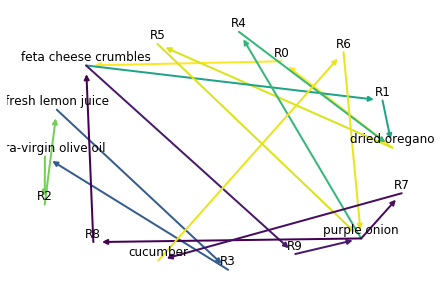

greek


In [268]:
# greek
create_rules(filtered['greek'])
print('greek')

     support                          itemsets
12  0.172685                      (large eggs)
0   0.168750                   (baking powder)
14  0.151620                 (unsalted butter)
13  0.149306                            (milk)
4   0.146759                      (buttermilk)
6   0.143981                            (eggs)
15  0.107407                 (vanilla extract)
1   0.103472                     (baking soda)
11  0.081019                     (kosher salt)
18  0.068519       (baking powder, buttermilk)
17  0.066204      (baking powder, baking soda)
2   0.062731                    (black pepper)
7   0.062269                           (flour)
21  0.061574         (buttermilk, baking soda)
9   0.060417                (granulated sugar)
3   0.060417                     (brown sugar)
20  0.060417  (unsalted butter, baking powder)
10  0.057407                 (ground cinnamon)
8   0.055093                   (garlic powder)
5   0.053935                  (cayenne pepper)
19  0.051157 

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


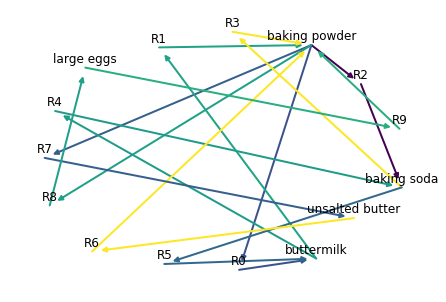

southern_us


In [269]:
# southern us
create_rules(filtered['southern_us'])
print('southern_us')

     support                  itemsets
19  0.332450               (soy sauce)
14  0.219868                     (oil)
3   0.169536                 (carrots)
9   0.129801              (fish sauce)
0   0.128477              (bay leaves)
8   0.123179                    (eggs)
6   0.121854             (cooking oil)
1   0.107285             (brown sugar)
5   0.098013            (coconut milk)
24  0.092715   (soy sauce, bay leaves)
11  0.086093            (green onions)
10  0.086093                  (ginger)
21  0.086093                 (vinegar)
25  0.084768      (soy sauce, carrots)
28  0.080795          (soy sauce, oil)
7   0.075497             (corn starch)
20  0.071523                (tomatoes)
16  0.066225                (potatoes)
23  0.064901           (white vinegar)
12  0.062252             (ground pork)
27  0.058278         (oil, fish sauce)
15  0.058278                    (pork)
22  0.056954             (white sugar)
29  0.054305      (soy sauce, vinegar)
17  0.052980         (red

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


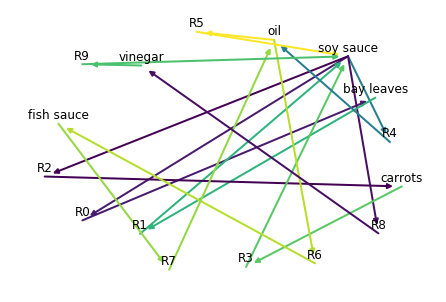

filipino


In [270]:
# filipino
create_rules(filtered['filipino'])
print('filipino')

     support                          itemsets
22  0.287046                    (garam masala)
30  0.242424                 (ground turmeric)
18  0.232101                      (cumin seed)
29  0.227439                    (ground cumin)
35  0.181818                             (oil)
25  0.175158                          (ginger)
44  0.173493                        (tomatoes)
45  0.163836                         (tumeric)
5   0.161505                    (chili powder)
26  0.161172                   (green chilies)
20  0.134199                    (curry powder)
28  0.126540                (ground coriander)
21  0.126207                    (fresh ginger)
9   0.117549                 (cilantro leaves)
12  0.101898                           (clove)
64  0.094572   (ground turmeric, garam masala)
56  0.092241     (ground turmeric, cumin seed)
24  0.090909                            (ghee)
32  0.090243                     (lemon juice)
74  0.085914  (ground cumin, ground coriander)
75  0.085248 

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


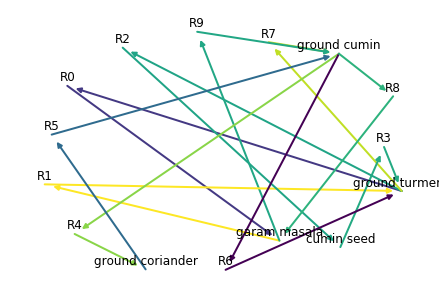

indian


In [271]:
# indian
create_rules(filtered['indian'])
print('indian')

     support                                           itemsets
21  0.243346                                  (ground allspice)
35  0.211027                                        (scallions)
12  0.199620                                      (dried thyme)
2   0.195817                                     (black pepper)
22  0.142586                                  (ground cinnamon)
3   0.136882                                      (brown sugar)
38  0.136882                                            (thyme)
8   0.134981                                     (coconut milk)
37  0.127376                                        (soy sauce)
10  0.125475                                     (curry powder)
20  0.123574                                     (green onions)
25  0.115970                                    (ground nutmeg)
17  0.112167                                      (fresh thyme)
42  0.112167                     (dried thyme, ground allspice)
0   0.100760                            

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


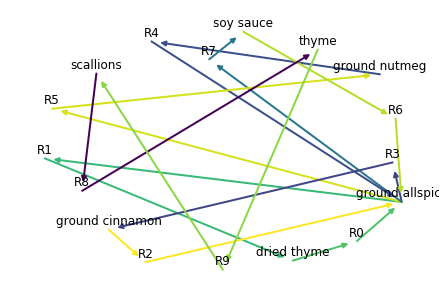

jamaican


In [272]:
# jamaican
create_rules(filtered['jamaican'])
print('jamaican')

In [251]:
# spanish
create_rules(filtered['spanish'])
print('spanish')

     support                               itemsets
6   0.257836               (extra-virgin olive oil)
24  0.152679                             (tomatoes)
20  0.143579                      (red bell pepper)
12  0.121335                          (kosher salt)
13  0.117290                           (large eggs)
9   0.101112                        (fresh parsley)
4   0.100101                       (dry white wine)
22  0.096057                      (saffron threads)
5   0.088979                                 (eggs)
17  0.083923                              (paprika)
7   0.082912                    (flat leaf parsley)
15  0.072801                                (lemon)
14  0.071790                  (large garlic cloves)
0   0.071790                         (black pepper)
23  0.069767                       (sherry vinegar)
10  0.067745                    (green bell pepper)
3   0.062690                       (diced tomatoes)
18  0.060667                             (potatoes)
2   0.058645

IndexError: single positional indexer is out-of-bounds

In [252]:
# italian
create_rules(filtered['italian'])
print('italian')

     support                      itemsets
13  0.201454      (grated parmesan cheese)
8   0.173769      (extra-virgin olive oil)
10  0.100408                 (fresh basil)
6   0.083950              (dry white wine)
14  0.083695                 (kosher salt)
0   0.081143                (black pepper)
12  0.080505               (fresh parsley)
7   0.079995                        (eggs)
5   0.079867               (dried oregano)
15  0.079740                  (large eggs)
19  0.076678                    (tomatoes)
9   0.075019           (flat leaf parsley)
20  0.071957             (unsalted butter)
1   0.062644               (cooking spray)
17  0.060475             (parmesan cheese)
11  0.060092           (fresh lemon juice)
3   0.054733              (diced tomatoes)
4   0.054223                 (dried basil)
2   0.053330          (crushed red pepper)
18  0.052564  (shredded mozzarella cheese)
16  0.050523           (mozzarella cheese)
Empty DataFrame
Columns: [antecedents, consequents, su

IndexError: single positional indexer is out-of-bounds

In [253]:
# mexican
create_rules(cuisine_dict['mexican'])
print('mexican')

     support                      itemsets
21  0.209071                (ground cumin)
5   0.191985                (chili powder)
22  0.178006            (jalapeno chilies)
30  0.167133                  (sour cream)
0   0.162007                     (avocado)
10  0.146940              (corn tortillas)
28  0.143368                       (salsa)
7   0.140727      (chopped cilantro fresh)
31  0.135290                    (tomatoes)
15  0.127058             (flour tortillas)
1   0.125971                 (black beans)
24  0.113700                        (lime)
17  0.100342            (fresh lime juice)
19  0.099099                (green onions)
11  0.097080                       (cumin)
26  0.095993                (purple onion)
8   0.095837                    (cilantro)
23  0.093352                 (kosher salt)
29  0.093041     (shredded cheddar cheese)
12  0.084498              (diced tomatoes)
25  0.083566                  (lime juice)
34  0.083566  (ground cumin, chili powder)
13  0.08046

IndexError: single positional indexer is out-of-bounds

     support                                          itemsets
33  0.509914                                       (soy sauce)
31  0.342312                                      (sesame oil)
8   0.338945                                     (corn starch)
13  0.234942                                    (green onions)
72  0.222222                           (soy sauce, sesame oil)
30  0.221100                                       (scallions)
51  0.199776                          (soy sauce, corn starch)
12  0.183315                                          (ginger)
11  0.175458                                    (fresh ginger)
28  0.172465                                    (rice vinegar)
61  0.134306                         (soy sauce, green onions)
71  0.131687                            (soy sauce, scallions)
50  0.127946                         (sesame oil, corn starch)
22  0.126450                                             (oil)
23  0.124579                                    (oyster

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


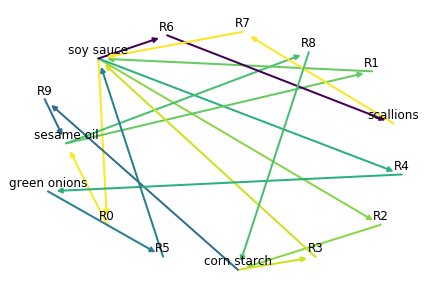

chinese


In [254]:
# chinese
create_rules(filtered['chinese'])
print('chinese')

     support                          itemsets
9   0.251244                            (milk)
12  0.237562                 (unsalted butter)
3   0.237562                            (eggs)
0   0.151741                   (baking powder)
8   0.136816                      (large eggs)
6   0.114428                     (heavy cream)
22  0.111940                      (eggs, milk)
4   0.101990                           (flour)
1   0.090796                     (baking soda)
23  0.082090     (unsalted butter, large eggs)
10  0.080846                        (potatoes)
20  0.080846  (unsalted butter, baking powder)
7   0.074627                     (kosher salt)
2   0.073383                         (carrots)
13  0.073383                 (vanilla extract)
14  0.068408                  (whipping cream)
17  0.064677            (worcestershire sauce)
16  0.063433                      (whole milk)
19  0.058458       (baking powder, large eggs)
15  0.054726                     (white sugar)
5   0.053483 

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


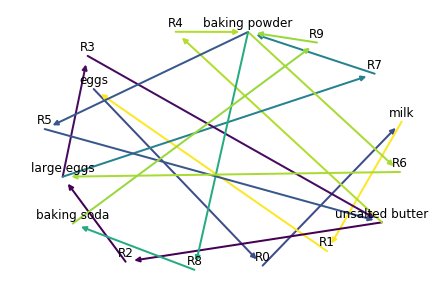

british


In [255]:
# british
create_rules(filtered['british'])
print('british')

     support                        itemsets
16  0.406108                    (fish sauce)
12  0.229370                  (coconut milk)
48  0.215724                     (soy sauce)
20  0.177388              (fresh lime juice)
29  0.174789                          (lime)
23  0.165692                  (green onions)
46  0.152047                      (shallots)
27  0.149448                    (lemongrass)
30  0.142950                    (lime juice)
6   0.135153                   (brown sugar)
19  0.129955                  (fresh ginger)
39  0.119558               (red bell pepper)
55  0.115010      (fish sauce, coconut milk)
11  0.114360               (cilantro leaves)
7   0.113710                       (carrots)
36  0.107212                       (peanuts)
9   0.106563        (chopped cilantro fresh)
43  0.099415                  (rice vinegar)
4   0.098765                   (beansprouts)
58  0.088369  (fresh lime juice, fish sauce)
44  0.087719                     (scallions)
45  0.0877

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


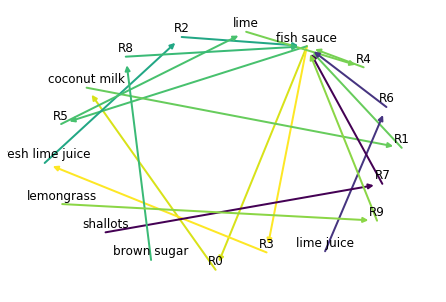

thai


In [256]:
# thai
create_rules(filtered['thai'])
print('thai')

     support                         itemsets
13  0.475152                     (fish sauce)
6   0.237576                        (carrots)
39  0.187879                      (soy sauce)
37  0.183030                       (shallots)
34  0.163636                   (rice vinegar)
2   0.153939                    (beansprouts)
18  0.144242                   (green onions)
15  0.133333               (fresh lime juice)
24  0.128485                     (lime juice)
9   0.122424                (cilantro leaves)
11  0.121212                       (cucumber)
35  0.120000                      (scallions)
22  0.118788                     (lemongrass)
62  0.117576           (shallots, fish sauce)
23  0.117576                           (lime)
21  0.107879                    (kosher salt)
14  0.104242                   (fresh ginger)
36  0.103030                     (sesame oil)
5   0.099394                     (canola oil)
48  0.098182            (carrots, fish sauce)
45  0.096970        (beansprouts, 

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


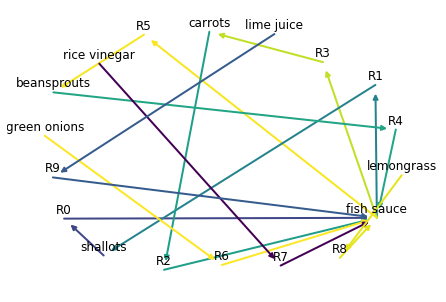

vietnamese


In [257]:
# vietnamese
create_rules(filtered['vietnamese'])
print('vietnamese')

     support                                itemsets
22  0.217335                     (green bell pepper)
5   0.192109                        (cayenne pepper)
4   0.189521                       (cajun seasoning)
23  0.165589                          (green onions)
6   0.159120                                (celery)
17  0.156533                           (dried thyme)
0   0.144890                     (andouille sausage)
2   0.142303                            (bay leaves)
14  0.139715                      (creole seasoning)
40  0.131953                                (shrimp)
20  0.124838                         (fresh parsley)
37  0.124191                               (paprika)
45  0.120310                  (worcestershire sauce)
15  0.119017                        (diced tomatoes)
8   0.113195                         (chicken broth)
7   0.111902                           (celery ribs)
3   0.109961                          (black pepper)
26  0.109314                             (hot 

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


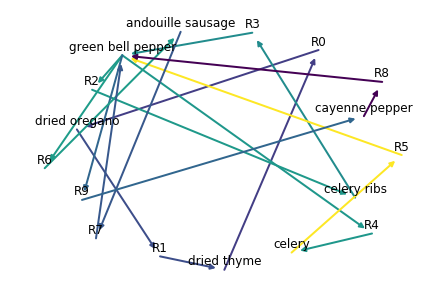

cajun_creole


In [258]:
# cajun_creole
create_rules(filtered['cajun_creole'])
print('cajun_creole')

In [259]:
# brazilian
create_rules(filtered['brazilian'])
print('brazilian')

     support                    itemsets
7   0.190578                      (lime)
2   0.149893                   (cachaca)
12  0.134904                  (tomatoes)
4   0.124197              (coconut milk)
11  0.122056  (sweetened condensed milk)
5   0.111349                      (eggs)
9   0.094218                      (milk)
13  0.092077             (lime, cachaca)
1   0.077088               (black beans)
0   0.062099                (bay leaves)
10  0.062099           (red bell pepper)
3   0.055675                   (carrots)
6   0.055675                       (ice)
8   0.053533                (lime juice)
  antecedents consequents   support  confidence
0      (lime)   (cachaca)  0.092077    0.483146
1   (cachaca)      (lime)  0.092077    0.614286


IndexError: single positional indexer is out-of-bounds

In [260]:
# french
create_rules(filtered['french'])
print('french')

     support                       itemsets
18  0.223734              (unsalted butter)
14  0.156841                   (large eggs)
17  0.121315                     (shallots)
7   0.096750       (extra-virgin olive oil)
5   0.092593               (dry white wine)
8   0.090325            (fresh lemon juice)
13  0.083900              (large egg yolks)
2   0.083522                      (carrots)
19  0.082766              (vanilla extract)
10  0.079365                  (heavy cream)
16  0.071051                         (milk)
21  0.070295  (unsalted butter, large eggs)
6   0.069917                         (eggs)
1   0.065004                 (black pepper)
20  0.064626               (whipping cream)
4   0.064248                (dijon mustard)
3   0.062736                (cooking spray)
9   0.062736                (fresh parsley)
11  0.057823                  (kosher salt)
0   0.056311                     (bay leaf)
15  0.051776                        (leeks)
12  0.051398             (large 

IndexError: single positional indexer is out-of-bounds

     support                   itemsets
18  0.394238                (soy sauce)
10  0.282502                    (mirin)
14  0.203092                     (sake)
13  0.183415             (rice vinegar)
26  0.170063         (soy sauce, mirin)
15  0.160928                (scallions)
5   0.133521                   (ginger)
16  0.130710               (sesame oil)
28  0.129304          (soy sauce, sake)
0   0.129304                  (carrots)
6   0.122980             (green onions)
24  0.118763              (sake, mirin)
12  0.102600                      (oil)
3   0.101195                     (eggs)
17  0.087843             (sesame seeds)
4   0.087140             (fresh ginger)
2   0.086437                    (dashi)
27  0.085734  (soy sauce, rice vinegar)
22  0.080112        (soy sauce, ginger)
29  0.079410     (soy sauce, scallions)
31  0.078707   (soy sauce, sake, mirin)
30  0.077301    (soy sauce, sesame oil)
23  0.065355  (soy sauce, green onions)
1   0.063247              (corn starch)


C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


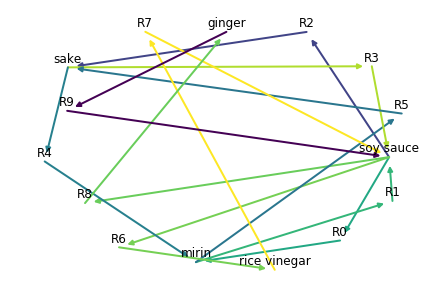

japanese


In [261]:
# japanese
create_rules(filtered['japanese'])
print('japanese')

     support                      itemsets
16  0.179910                    (potatoes)
2   0.172414                 (baking soda)
1   0.167916               (baking powder)
15  0.166417                        (milk)
7   0.157421                     (carrots)
9   0.134933                        (eggs)
18  0.130435             (unsalted butter)
13  0.115442                  (large eggs)
5   0.112444                  (buttermilk)
23  0.098951     (buttermilk, baking soda)
20  0.094453  (baking powder, baking soda)
6   0.080960                     (cabbage)
8   0.071964               (cooking spray)
3   0.065967                (black pepper)
24  0.062969           (carrots, potatoes)
10  0.062969                       (flour)
17  0.059970                     (raisins)
11  0.059970               (fresh parsley)
12  0.058471                 (heavy cream)
14  0.056972                       (leeks)
19  0.056972           (whole wheat flour)
4   0.056972                 (brown sugar)
0   0.05397

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


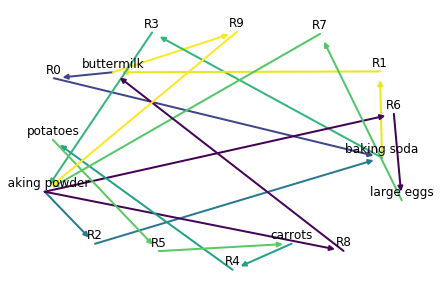

irish


In [262]:
# irish
create_rules(filtered['irish'])
print('irish')

     support                                       itemsets
26  0.514458                                    (soy sauce)
23  0.485542                                   (sesame oil)
11  0.353012                                 (green onions)
70  0.339759                        (soy sauce, sesame oil)
24  0.268675                                 (sesame seeds)
22  0.236145                                    (scallions)
52  0.209639                     (sesame oil, green onions)
54  0.206024                      (soy sauce, green onions)
5   0.204819                                      (carrots)
69  0.181928                     (sesame seeds, sesame oil)
72  0.178313                      (soy sauce, sesame seeds)
10  0.173494                                       (ginger)
0   0.163855                               (Gochujang base)
20  0.153012                                 (rice vinegar)
83  0.153012          (soy sauce, sesame oil, green onions)
3   0.139759                            

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


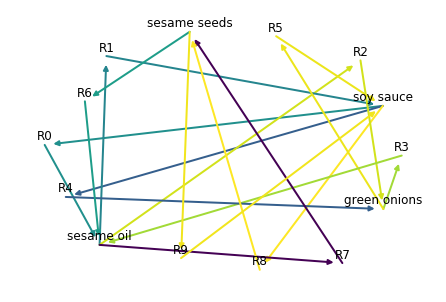

korean


In [263]:
# korean
create_rules(filtered['korean'])
print('korean')

     support                                           itemsets
24  0.423873                                     (ground cumin)
22  0.271620                                  (ground cinnamon)
25  0.213155                                    (ground ginger)
1   0.188794                                          (carrots)
31  0.182704                                          (paprika)
8   0.172960                                         (couscous)
23  0.168088                                 (ground coriander)
58  0.165652                    (ground cumin, ground cinnamon)
13  0.155907                           (extra-virgin olive oil)
4   0.154689                                        (chickpeas)
16  0.153471                                (fresh lemon juice)
5   0.148599                           (chopped cilantro fresh)
6   0.146163                                         (cinnamon)
61  0.144945                   (ground cumin, ground coriander)
29  0.132765                            

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


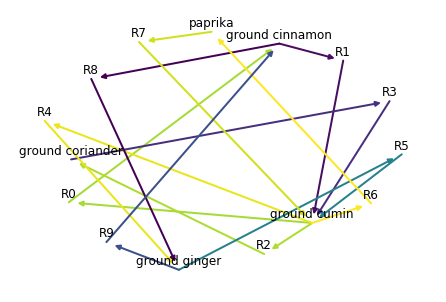

moroccan


In [264]:
# moroccan
create_rules(filtered['moroccan'])
print('moroccan')

     support                       itemsets
19  0.239264                   (sour cream)
8   0.229039                         (eggs)
20  0.190184              (unsalted butter)
11  0.173824                   (large eggs)
6   0.157464                      (carrots)
15  0.134969                         (milk)
16  0.134969                     (potatoes)
9   0.124744                        (flour)
10  0.110429                   (fresh dill)
3   0.108384                        (beets)
29  0.098160  (unsalted butter, large eggs)
25  0.085890                  (flour, eggs)
26  0.079755                   (eggs, milk)
5   0.075665                      (cabbage)
23  0.075665            (carrots, potatoes)
0   0.071575             (active dry yeast)
1   0.071575                (baking powder)
4   0.071575                 (black pepper)
7   0.065440                         (dill)
14  0.063395                    (mayonaise)
13  0.063395                  (lemon juice)
12  0.063395                    

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


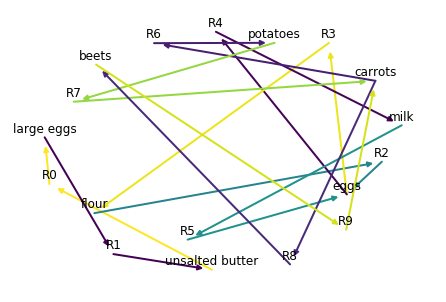

russian


In [265]:
# russian
create_rules(filtered['russian'])
print('russian')